In [2]:
%reload_ext autoreload
%matplotlib inline
%autoreload 2

In [38]:
from fastai.conv_learner import *

In [39]:
PATH = 'data/planet/'

In [5]:
#os.makedirs('data/planet/models',exist_ok = True)
#os.makedirs('data/planet/tmp', exist_ok  = True)

In [5]:
ls {PATH}

__MACOSX/                test-jpg-additional.tar.7z  train-jpg.tar
models/                  test-jpg.tar                train-jpg.tar.7z
test-jpg/                test-jpg.tar.7z             train-tif-v2.tar.7z
test-jpg-additional/     tmp/                        train_v2.csv
test-jpg-additional.tar  train-jpg/                  train_v2.csv.zip


In [6]:
from fastai.plots import *

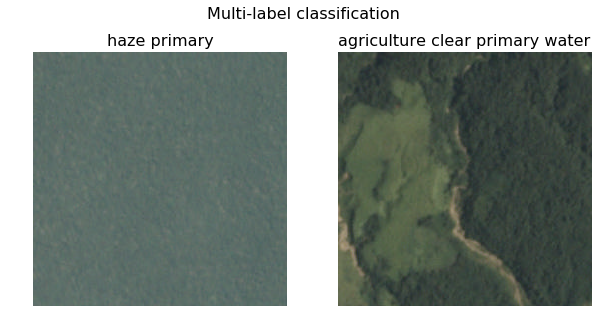

In [6]:
list_paths = [f"{PATH}train-jpg/train_0.jpg", f"{PATH}train-jpg/train_1.jpg"]
titles=["haze primary", "agriculture clear primary water"]
plots_from_files(list_paths, titles=titles, maintitle="Multi-label classification")

In [40]:
from planet import f2

metrics=[f2]
f_model = resnet34

In [41]:
label_csv = f'{PATH}train_v2.csv'
n = len(list(open(label_csv)))-1
val_idxs = get_cv_idxs(n)

In [42]:
def get_data(sz):
    tfms = tfms_from_model(f_model, sz, aug_tfms = transforms_top_down, max_zoom = 1.05)
    return ImageClassifierData.from_csv(PATH, 'train-jpg', label_csv, tfms = tfms, suffix = '.jpg', val_idxs = val_idxs,
                                       test_name = 'test-jpg-additional')

In [43]:
data = get_data(256)

In [11]:
x,y = next(iter(data.val_dl))

In [27]:
y


    1     0     0  ...      0     0     1
    0     0     0  ...      0     0     0
    1     0     0  ...      0     0     0
       ...          ⋱          ...       
    1     0     0  ...      0     0     1
    0     0     0  ...      0     0     0
    0     0     0  ...      0     0     1
[torch.cuda.FloatTensor of size 64x17 (GPU 0)]

In [28]:
list(zip(data.classes, y[0]))

[('agriculture', 1.0),
 ('artisinal_mine', 0.0),
 ('bare_ground', 0.0),
 ('blooming', 0.0),
 ('blow_down', 0.0),
 ('clear', 1.0),
 ('cloudy', 0.0),
 ('conventional_mine', 0.0),
 ('cultivation', 0.0),
 ('habitation', 0.0),
 ('haze', 0.0),
 ('partly_cloudy', 0.0),
 ('primary', 1.0),
 ('road', 0.0),
 ('selective_logging', 0.0),
 ('slash_burn', 0.0),
 ('water', 1.0)]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


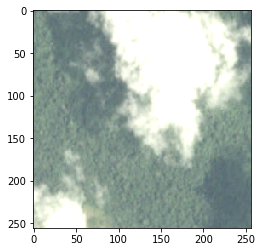

In [16]:
plt.imshow(data.val_ds.denorm(to_np(x))[1]*1.4)

In [14]:
sz = 64

In [15]:
data = get_data(sz)

In [16]:
data = data.resize(int(sz*1.3), 'tmp')

HBox(children=(IntProgress(value=0, max=6), HTML(value='')))

In [17]:
learn = ConvLearner.pretrained(f_model,data, metrics = metrics)

In [16]:
#lrf = learn.lr_find()
#learn.sched.plot()

In [18]:
lr = 0.2

In [18]:
#learn.fit(lr, 3, cycle_len = 1, cycle_mult =2)

In [19]:
lrs = np.array([lr/9,lr/3,lr])

In [33]:
#learn.unfreeze()

In [34]:
#learn.fit(lrs, 3, cycle_len = 1, cycle_mult = 2)

In [35]:
#learn.save('amazon_m1')

In [36]:
#learn.load('amazon_m1')

In [37]:
#learn.sched.plot_loss()

In [38]:
#sz = 128

In [39]:
#learn.set_data(get_data(sz))
#learn.freeze()
#learn.fit(lr, 3, cycle_len = 1, cycle_mult = 2)

In [40]:
#learn.unfreeze()
#learn.fit(lrs, 3, cycle_len =1, cycle_mult = 2)

In [20]:
sz = 256

In [32]:
data = learn.set_data(get_data(sz))

In [18]:
#data = learn.set_data(get_data(sz))
#learn.freeze()
#learn.fit(lr,3, cycle_len = 1, cycle_mult = 2)

In [19]:
#learn.save('amazon_m2')

In [22]:
learn.unfreeze()

In [19]:
#learn.load('amazon_m2')

In [39]:
learn.unfreeze()
learn.fit(lrs, 3, cycle_len = 1, cycle_mult = 2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch      trn_loss   val_loss   f2                           
    0      0.083903   0.083009   0.931814  
    1      0.083543   0.083363   0.931546                     
    2      0.077939   0.081509   0.93308                      
    3      0.081451   0.084764   0.929146                     
    4      0.079869   0.082657   0.93272                      
    5      0.079656   0.081538   0.93188                      
    6      0.07905    0.081415   0.932907                     



[0.081414632, 0.93290702609456888]

In [41]:
#learn.save('amazon_m3')  

In [23]:
learn.load('amazon_m3')

In [24]:
log_preds,y = learn.TTA()

KeyboardInterrupt: 

In [47]:
preds = np.mean(log_preds,0)

In [48]:
f2(preds,y)

0.93181019862435621

In [49]:
import resource
rlimit = resource.getrlimit(resource.RLIMIT_NOFILE)
resource.setrlimit(resource.RLIMIT_NOFILE, (2048, rlimit[1]))

In [25]:
multip_preds, y = learn.TTA(is_test = True)

In [26]:
multip_preds
preds_test = np.mean(multip_preds,0)

In [27]:
df = pd.DataFrame(preds_test)

In [45]:
df.columns = data.classes

In [46]:
len(data.test_ds.fnames)

20522

In [47]:
len(df)

20522

In [28]:
df.insert(0,'id', [o[9:-4] for o in data.test_ds.fnames])
#df.insert(0,'id', [o[5:-4] for o in data.test_ds.fnames])

In [29]:
df

,id,agriculture,artisinal_mine,bare_ground,blooming,blow_down,clear,cloudy,conventional_mine,cultivation,habitation,haze,partly_cloudy,primary,road,selective_logging,slash_burn,water
0,file_377,0.000744,1.741919e-04,2.046094e-05,0.000029,8.893652e-09,0.999999,1.124933e-08,2.367592e-07,0.000141,2.576420e-06,0.000012,3.370147e-11,0.999997,3.775961e-04,4.035637e-06,8.469525e-07,1.000000
1,test_10404,0.001048,5.631149e-06,5.377386e-05,0.001705,1.245080e-04,0.909647,3.910250e-03,8.537945e-06,0.000133,9.368114e-05,0.001054,2.002387e-02,0.992396,1.378593e-04,9.551768e-05,1.261531e-05,0.002286
2,file_13432,0.339858,8.921310e-04,7.514147e-02,0.001040,2.859847e-03,0.834711,9.629765e-04,2.775060e-03,0.014734,6.997632e-01,0.003125,1.081040e-01,0.984549,2.641900e-01,4.771573e-04,9.101547e-04,0.012997
3,test_20519,0.143215,9.604396e-03,8.207064e-02,0.000369,1.416536e-03,0.896076,1.608159e-04,3.163755e-03,0.011161,2.872101e-01,0.015123,5.612126e-02,0.994536,5.528743e-02,1.197825e-03,5.111826e-04,0.193272
4,test_1380,0.995879,6.096985e-07,1.452259e-04,0.000094,2.979569e-05,0.957231,1.861125e-06,4.860889e-07,0.332632,2.494540e-02,0.058821,2.417084e-04,0.999903,1.856721e-02,3.053820e-05,4.842061e-04,0.001898
5,test_36486,0.990445,2.801655e-06,1.224831e-03,0.000186,8.268152e-05,0.998659,5.113611e-06,7.779585e-07,0.630828,1.783389e-03,0.001890,5.326086e-06,0.999215,1.790224e-03,2.108830e-05,5.146067e-03,0.002074
6,test_36890,0.000035,2.441455e-07,1.004816e-06,0.000019,7.893937e-06,0.000068,2.046058e-03,5.167389e-07,0.000004,1.349533e-07,0.000096,9.880127e-01,0.997566,9.254904e-07,1.210393e-06,1.426644e-06,0.000113
7,file_17532,0.909748,4.846880e-05,1.268511e-02,0.000853,2.276618e-04,1.000000,1.395620e-06,3.628578e-02,0.250336,5.384114e-01,0.000001,3.704095e-08,0.999358,5.309117e-01,8.235616e-04,1.171266e-01,0.045256
8,file_13042,0.034043,1.853397e-05,4.563817e-03,0.000975,4.962589e-05,0.999995,6.500157e-07,4.903376e-05,0.000199,9.971677e-01,0.000126,1.775508e-07,0.967331,7.368948e-01,1.872309e-04,3.773335e-06,0.000056
9,test_16271,0.818432,1.381430e-04,5.606004e-02,0.000499,1.076132e-04,0.999911,6.910386e-06,2.575717e-02,0.017330,6.311670e-04,0.000336,6.272614e-07,0.997768,7.521270e-02,1.495202e-04,5.203435e-03,0.502601


['agriculture', 'cloudy', 'partly_cloudy', 'primary', 'water']


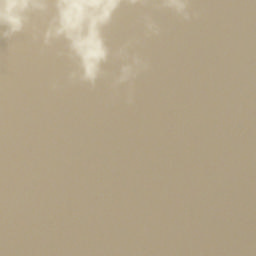

In [48]:
def get_labels(a): return [data.classes[o] for o in a.nonzero()[0]]

lbls = preds_test>0.2
idx=9
print(get_labels(lbls[idx]))
PIL.Image.open(PATH+data.test_dl.dataset.fnames[idx]).convert('RGB')

In [49]:
result = [get_labels(a) for a in lbls]

In [50]:
result

[['clear', 'primary', 'water'],
 ['partly_cloudy', 'primary'],
 ['agriculture', 'clear', 'cultivation', 'primary', 'road'],
 ['clear', 'habitation', 'primary', 'road'],
 ['clear', 'primary'],
 ['clear', 'haze', 'primary'],
 ['clear', 'primary'],
 ['agriculture', 'clear', 'primary'],
 ['clear', 'primary'],
 ['agriculture', 'cloudy', 'partly_cloudy', 'primary', 'water'],
 ['clear', 'primary', 'water'],
 ['agriculture', 'clear', 'cultivation', 'habitation', 'primary', 'road'],
 ['agriculture', 'clear', 'cultivation', 'primary'],
 ['cloudy', 'partly_cloudy', 'primary', 'road', 'water'],
 ['partly_cloudy', 'primary'],
 ['clear', 'primary'],
 ['clear', 'primary'],
 ['partly_cloudy', 'primary'],
 ['cloudy', 'haze', 'primary'],
 ['partly_cloudy', 'primary'],
 ['agriculture', 'clear', 'cultivation', 'primary'],
 ['clear', 'cloudy', 'primary', 'water'],
 ['agriculture', 'blooming', 'clear', 'cultivation', 'primary'],
 ['partly_cloudy', 'primary'],
 ['agriculture', 'clear', 'cultivation', 'primar

In [51]:
outp = pd.DataFrame({'image_name': [o[9:-4] for o in data.test_ds.fnames],
                     'tags': [' '.join(l) for l in result]})
outp.head()

,image_name,tags
0,additional/file_377,clear primary water
1,additional/file_13432,partly_cloudy primary
2,additional/file_17532,agriculture clear cultivation primary road
3,additional/file_13042,clear habitation primary road
4,additional/file_18856,clear primary


In [52]:
data.test_ds.fnames

['test-jpg-additional/file_377.jpg',
 'test-jpg-additional/file_13432.jpg',
 'test-jpg-additional/file_17532.jpg',
 'test-jpg-additional/file_13042.jpg',
 'test-jpg-additional/file_18856.jpg',
 'test-jpg-additional/file_4087.jpg',
 'test-jpg-additional/file_3680.jpg',
 'test-jpg-additional/file_14306.jpg',
 'test-jpg-additional/file_15269.jpg',
 'test-jpg-additional/file_9994.jpg',
 'test-jpg-additional/file_757.jpg',
 'test-jpg-additional/file_6488.jpg',
 'test-jpg-additional/file_8996.jpg',
 'test-jpg-additional/file_8444.jpg',
 'test-jpg-additional/file_10025.jpg',
 'test-jpg-additional/file_2925.jpg',
 'test-jpg-additional/file_8902.jpg',
 'test-jpg-additional/file_180.jpg',
 'test-jpg-additional/file_13555.jpg',
 'test-jpg-additional/file_2459.jpg',
 'test-jpg-additional/file_13189.jpg',
 'test-jpg-additional/file_1954.jpg',
 'test-jpg-additional/file_7470.jpg',
 'test-jpg-additional/file_19096.jpg',
 'test-jpg-additional/file_2756.jpg',
 'test-jpg-additional/file_12552.jpg',
 'te

In [34]:
### test-jpg files ##
outp.to_csv(f'{PATH}tmp/subm.gz', compression = 'gzip', index = False)

In [35]:
FileLink(f'{PATH}tmp/subm.gz')

/home/pradeep/fastai/courses/dl1/data/planet/tmp/subm.gz

In [36]:
len(data.test_ds)

61191

In [54]:
## test-additional-jpg files 
outp = pd.DataFrame({'image_name': [o[20:-4] for o in data.test_ds.fnames],
                     'tags': [' '.join(l) for l in result]})
outp.head()

,image_name,tags
0,file_377,clear primary water
1,file_13432,partly_cloudy primary
2,file_17532,agriculture clear cultivation primary road
3,file_13042,clear habitation primary road
4,file_18856,clear primary


In [55]:
outp.to_csv(f'{PATH}tmp/subm2.gz', compression = 'gzip', index = False)

In [56]:
FileLink(f'{PATH}tmp/subm2.gz')

/home/pradeep/fastai/courses/dl1/data/planet/tmp/subm2.gz